## WasteWatch Sorting Model

Import all libraries and connect to drive to access dataset.

In [ ]:
!pip install -U tensorflow-addons
import cv2
import itertools
import math
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

from keras import layers, losses, regularizers, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop
from keras.layers import ( Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Lambda, Input)
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.metrics import MeanAbsoluteError
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda, BatchNormalization
from keras.optimizers import RMSprop, Adam
import keras.backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from sklearn import datasets

from google.colab.patches import cv2_imshow

from IPython.display import Image, display
import matplotlib.cm as cm
import tensorflow.keras.backend as K
from PIL import Image as Img

sns.set(style='white', context='notebook', palette='deep')
np.random.seed(2)

from google.colab import drive
drive.mount('/content/drive')

## Data

In [ ]:
x_train = np.load("/content/drive/MyDrive/WasteWatchData/mlData/x_train11.npy")
Y_train = np.load("/content/drive/MyDrive/WasteWatchData/mlData/y_train1.npy")
x_test = np.load("/content/drive/MyDrive/WasteWatchData/mlData/x_test1.npy")
Y_test = np.load("/content/drive/MyDrive/WasteWatchData/mlData/y_test1.npy")

## Model

In [ ]:
num_classes = 6
input_shape = (128,128,3)

In [ ]:
print(f"x_train shape:{x_train.shape} - y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {Y_test.shape}")

x_train shape:(4580, 128, 128, 3) - y_train shape: (4580, 6)
x_test shape: (1128, 128, 128, 3) - y_test shape: (1128, 6)


In [ ]:
def create_complex_model(num_classes, input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax")
    ])

    return model

In [ ]:
model = create_complex_model(num_classes, input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 128)     512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define learning rate schedule callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

# Define optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the model
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(x_train, Y_train, epochs=epochs, validation_data=(x_test, Y_test), verbose=1, callbacks=[reduce_lr])


Epoch 1/50
144/144 [==============================] - 74s 326ms/step - loss: 1.6455 - accuracy: 0.3574 - val_loss: 2.3763 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 2/50
144/144 [==============================] - 43s 298ms/step - loss: 1.5085 - accuracy: 0.4050 - val_loss: 1.9208 - val_accuracy: 0.2571 - lr: 0.0010
Epoch 3/50
144/144 [==============================] - 42s 290ms/step - loss: 1.4397 - accuracy: 0.4177 - val_loss: 1.8170 - val_accuracy: 0.2438 - lr: 0.0010
Epoch 4/50
144/144 [==============================] - 42s 294ms/step - loss: 1.4051 - accuracy: 0.4384 - val_loss: 1.5043 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 5/50
144/144 [==============================] - 42s 289ms/step - loss: 1.3465 - accuracy: 0.4710 - val_loss: 1.5461 - val_accuracy: 0.3626 - lr: 0.0010
Epoch 6/50
144/144 [==============================] - 42s 289ms/step - loss: 1.3302 - accuracy: 0.4884 - val_loss: 2.3508 - val_accuracy: 0.2465 - lr: 0.0010
Epoch 7/50
144/144 [==============================] 

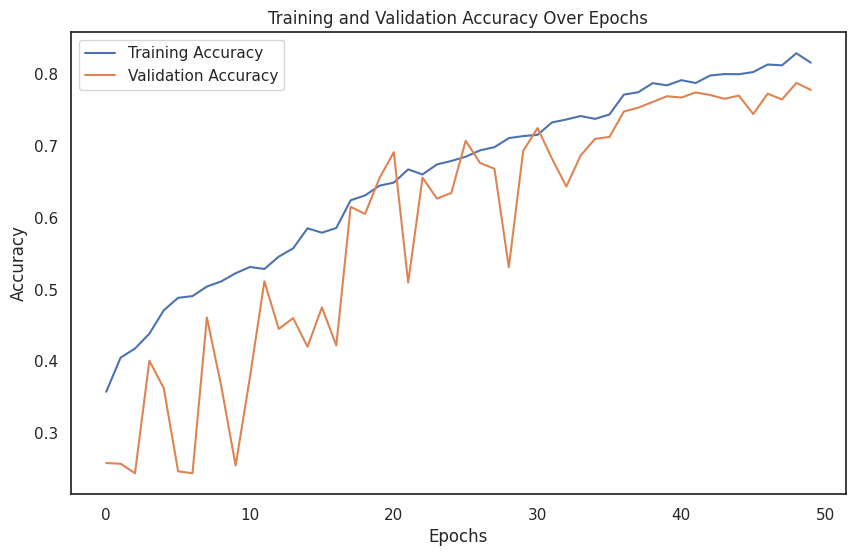

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Assuming hist is the variable containing your training history
plot_training_history(hist)


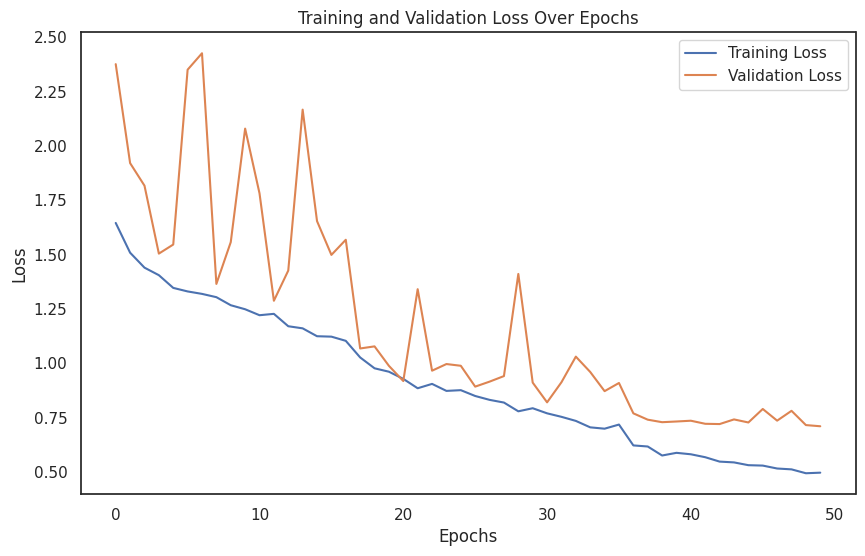

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming hist is the variable containing your training history
plot_loss_history(hist)


In [ ]:
model.save("/content/drive/MyDrive/WasteWatchData/mlData/ml3/")
# model = tf.keras.models.load_model("/content/drive/MyDrive/WasteWatchData/mlData/ml/")

In [ ]:
def reverse_make_labels(label_code):
    if label_code == 0:
        return "e-waste"
    elif label_code == 1:
        return "batteries"
    elif label_code == 2:
        return "glass"
    elif label_code == 3:
        return "metal"
    elif label_code == 4:
        return "organic"
    elif label_code == 5:
        return "paper"
    # Add more conditions for the remaining labels if needed
    else:
        return None  # or raise an exception if the label code is not recognized


## XAI

In [ ]:
import keras
import tensorflow as tf
import numpy as np

def get_img_array(img_path, size):
    """
    Load and preprocess an image from the given path.

    Parameters:
    - img_path (str): Path to the image file.
    - size (tuple): Target size for the image.

    Returns:
    - array (numpy.ndarray): Processed image array.
    """
    # Load the image and convert it to an array
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generate a Grad-CAM heatmap for a given image.

    Parameters:
    - img_array (numpy.ndarray): Image array.
    - model (keras.Model): Trained neural network model.
    - last_conv_layer_name (str): Name of the last convolutional layer.
    - pred_index (int, optional): Index of the predicted class.

    Returns:
    - heatmap (numpy.ndarray): Grad-CAM heatmap.
    """
    # Create a sub-model to get the output of the last convolutional layer and predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Use GradientTape to calculate the gradient of the predicted class with respect to
    # the output of the last convolutional layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean of the gradients along the spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the output of the last convolutional layer with the pooled gradients
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


1/1 [==============================] - 0s 127ms/step
Predicted Class: e-waste


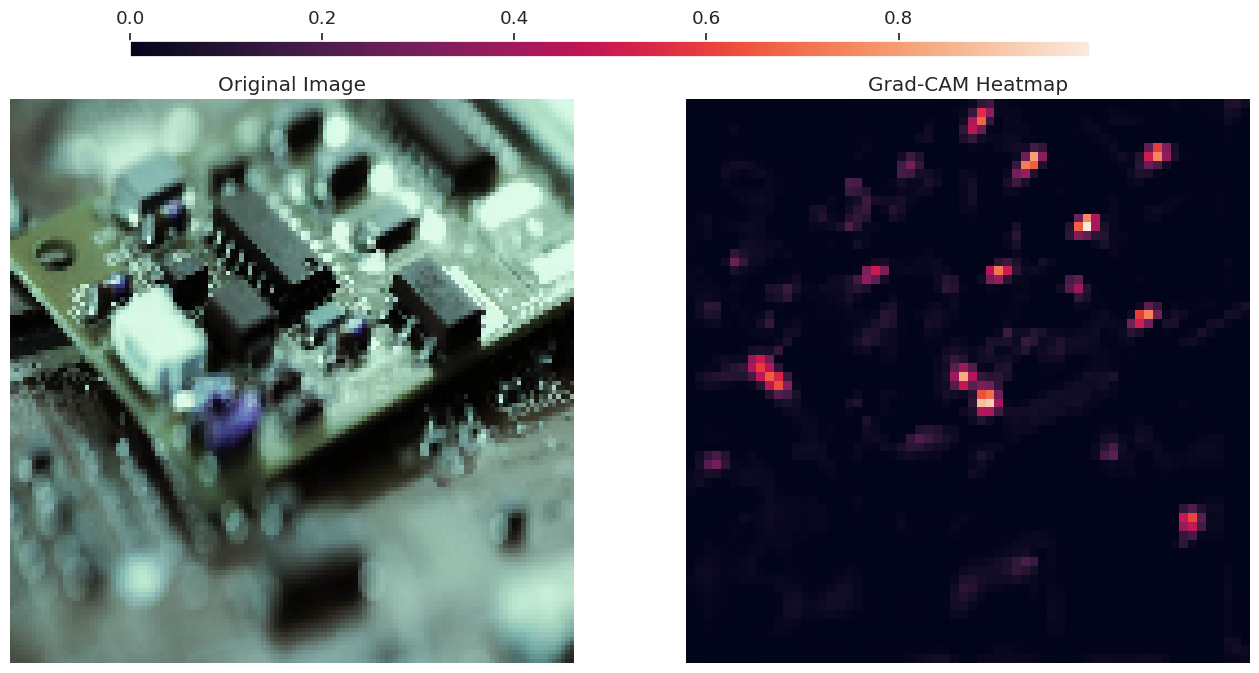

In [ ]:
# Select an example image from the test set
i = -350
myimage = np.reshape(x_test[i], (1, 128, 128, 3))

# Get model predictions for the selected image
mylist = model.predict(myimage).flatten()

# Configure the model for Grad-CAM visualization
model_builder = keras.applications.xception.Xception
img_size = (128, 128)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
last_conv_layer_name = "conv2d_3"

# Deactivate the final layer activation for better Grad-CAM visualization
model.layers[-1].activation = None
preds = model.predict(myimage)

# Print the predicted class label using a reverse mapping function
print("Predicted Class:", reverse_make_labels(np.argmax(mylist)))

# Plot the original image and Grad-CAM heatmap side by side
plt.figure(figsize=(16, 8))

# Plot Grad-CAM heatmap
plt.subplot(1, 2, 2)
heatmap = make_gradcam_heatmap(myimage, model, last_conv_layer_name)
plt.imshow(heatmap)
plt.title('Grad-CAM Heatmap')
plt.axis('off')

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[i])
plt.title('Original Image')
plt.axis('off')

# Add a color bar to the heatmap
cax = plt.axes([0.2, 0.9, 0.6, .02])
cbar = plt.colorbar(cax=cax, orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('top')

# Display the plot
plt.show()


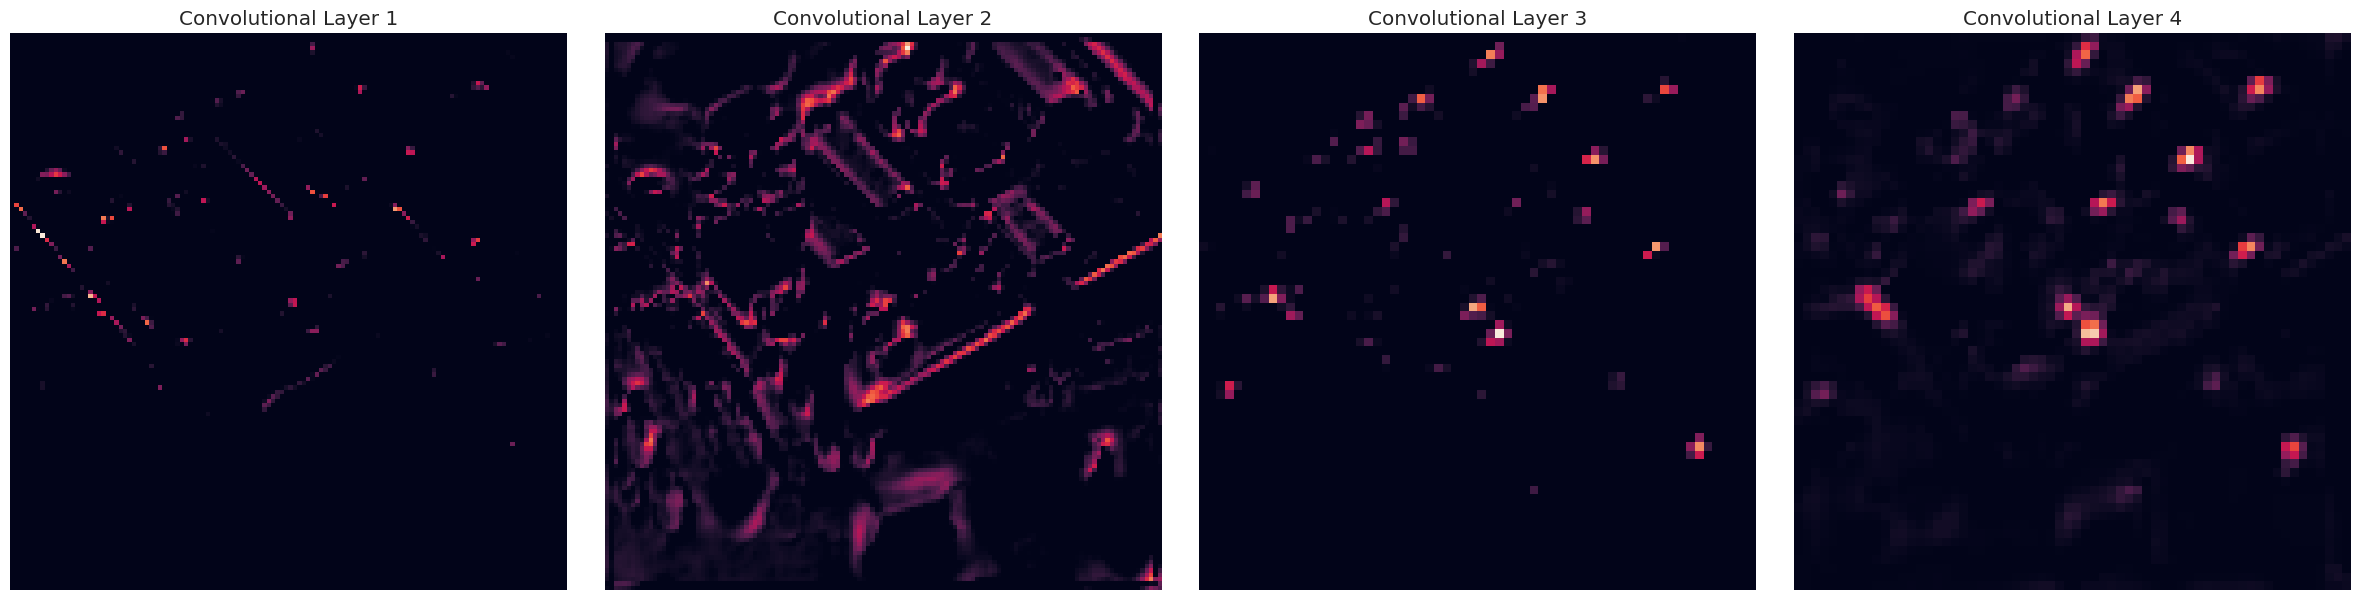

In [ ]:
# Create a 1x4 subplot grid for visualizing Grad-CAM heatmaps of different convolutional layers
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Specify the names of the convolutional layers for visualization
# (Make sure these layer names match the layers in your model)
layer_names = ["conv2d", "conv2d_1", "conv2d_2", "conv2d_3"]

# Iterate over each layer and plot its Grad-CAM heatmap
for l, layer_name in enumerate(layer_names):
    # Generate Grad-CAM heatmap for the current layer
    heatmap = make_gradcam_heatmap(myimage, model, layer_name)

    # Plot the heatmap in the corresponding subplot
    axs[l].imshow(heatmap)

    # Set the title for the subplot indicating the convolutional layer
    axs[l].set_title(f"Convolutional Layer {l+1}")

    # Turn off axes for each subplot
    axs[l].axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

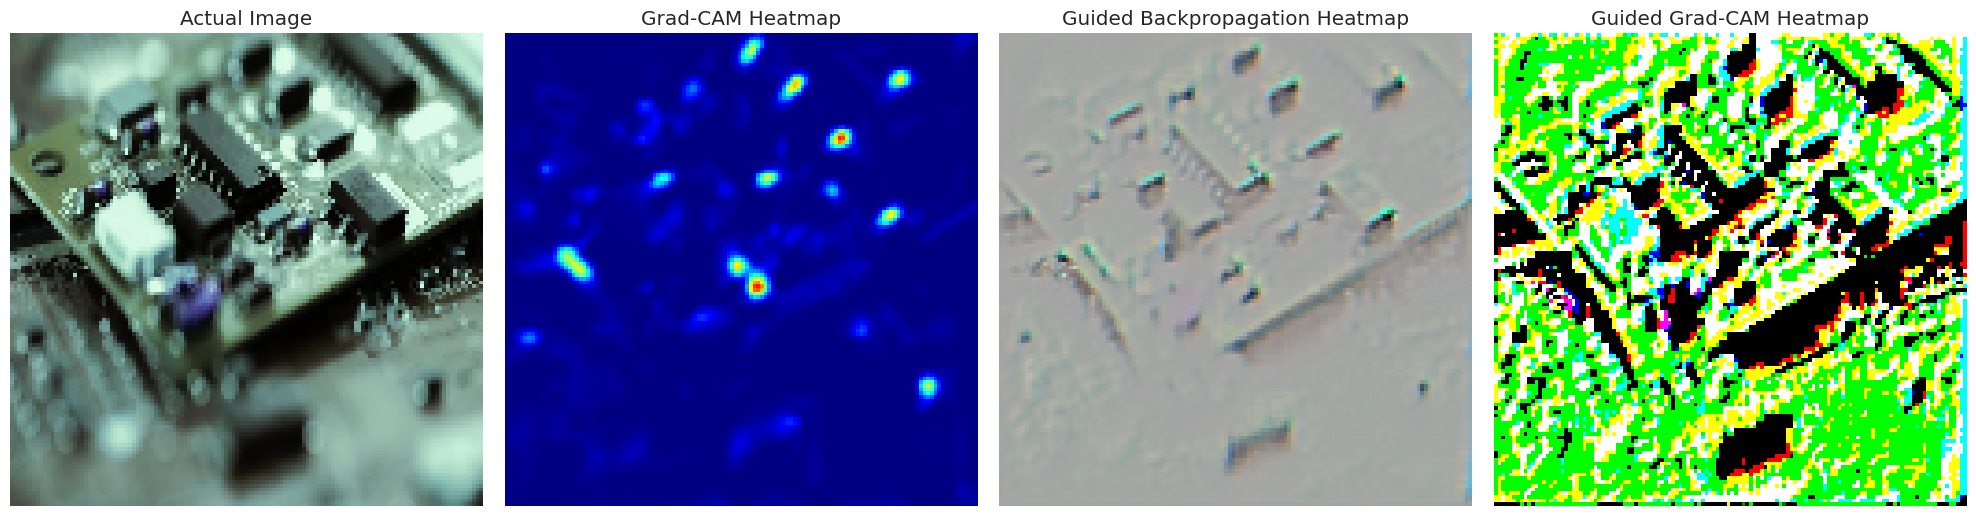

In [ ]:
# Define the last convolutional layer's name
LAYER_NAME = last_conv_layer_name

# Preprocess the input image
img = x_test[i]
preprocessed_input = np.expand_dims(img, axis=0)

# Create a modified model to extract the output of the last convolutional layer
gb_model = tf.keras.models.Model(
    inputs=[model.inputs],
    outputs=[model.get_layer(LAYER_NAME).output]
)
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer, 'activation')]

# Define a custom gradient function for guided ReLU
@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy > 0, "float32") * tf.cast(x > 0, "float32") * dy
    return tf.nn.relu(x), grad

# Modify activation functions in the model to use guided ReLU
for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu

# Use GradientTape to calculate the guided backpropagation
with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)[0]

grads = tape.gradient(outputs, inputs)[0]

# Visualize guided backpropagation
gb_viz = np.dstack((
    grads[:, :, 0],
    grads[:, :, 1],
    grads[:, :, 2],
))
gb_viz -= np.min(gb_viz)
gb_viz /= gb_viz.max()

# Calculate Grad-CAM
weights = tf.reduce_mean(grads, axis=(0, 1))
grad_cam = np.ones(outputs.shape[0:2], dtype=np.float32)
for i, w in enumerate(weights):
    grad_cam += w * outputs[:, :, i]

# Create guided CAM
guided_cam = np.maximum(grad_cam, 0)
guided_cam = guided_cam / np.max(guided_cam)
guided_cam = resize(guided_cam, (128, 128), preserve_range=True)

# Pointwise multiplication of guided backpropagation and guided CAM
gd_gb = np.dstack((
    grads[:, :, 0] * guided_cam,
    grads[:, :, 1] * guided_cam,
    grads[:, :, 2] * guided_cam,
))

# Plot the original image, Grad-CAM heatmap, guided backpropagation, and guided Grad-CAM heatmap
plt.figure(figsize=(20, 12))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Actual Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(cv2.applyColorMap(np.uint8(255 * cv2.resize(grad_cam, (img.shape[1], img.shape[0]))), cv2.COLORMAP_JET), cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gb_viz)
plt.title('Guided Backpropagation Heatmap')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(gd_gb)
plt.title('Guided Grad-CAM Heatmap')
plt.axis('off')


# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


## Evaluation

In [ ]:
# Use the trained model to make predictions on the test data
y_pred1 = model.predict(x_test)

# Initialize empty lists to store the predicted and actual class labels
y_pred2 = []
y_test2 = []

# Process the predicted probabilities to obtain the predicted class labels
for i in y_pred1:
    pred = np.argmax(i)
    y_pred2.append(pred)

# Process the actual class labels from the ground truth test data
for i in Y_test:
    actual = np.argmax(i)
    y_test2.append(actual)


36/36 [==============================] - 2s 52ms/step


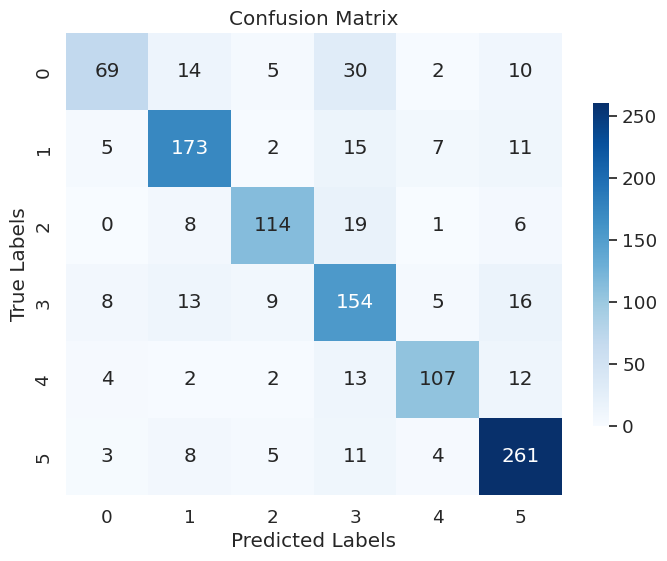

In [ ]:
# Calculate the confusion matrix using the true and predicted class labels
cm = confusion_matrix(y_test2, y_pred2)

# Define the class labels for better visualization on the heatmap
# (Make sure these labels match the order of classes in your dataset)
class_labels = ['0', '1', '2', '3', '4', '5']

# Set up the figure for the heatmap with a specified size
plt.figure(figsize=(8, 6))

# Set the font scale for better readability
sns.set(font_scale=1.2)

# Create a heatmap with annotations, using a blue color map
# The x and y tick labels are set to the defined class labels
# The color bar size is adjusted for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar_kws={"shrink": 0.7})

# Set labels and title for better clarity
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import numpy as np
from tabulate import tabulate

# Assuming y_pred2 and y_test2 are defined

# Calculate metrics for y_pred2
precision = precision_score(y_test2, y_pred2, average='weighted')
accuracy = accuracy_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2, average='weighted')
f1 = f1_score(y_test2, y_pred2, average='weighted')

# Store results in a list for the model's performance
results_y_pred2 = ["WasteWatch", precision, accuracy, recall, f1]

# Generate random numbers
random_numbers = np.random.randint(0, 2, len(y_pred2))

# Calculate metrics for random numbers (baseline)
precision_random = precision_score(y_test2, random_numbers, average='weighted')
accuracy_random = accuracy_score(y_test2, random_numbers)
recall_random = recall_score(y_test2, random_numbers, average='weighted')
f1_random = f1_score(y_test2, random_numbers, average='weighted')

# Store results in a list for the baseline performance
results_random = ["Baseline", precision_random, accuracy_random, recall_random, f1_random]

# Create a table using the tabulate library
table = tabulate([results_y_pred2, results_random], headers=["Method", "Precision", "Accuracy", "Recall", "F1"], tablefmt="pretty")

# Print the table
print(table)

+------------+---------------------+--------------------+--------------------+--------------------+
|   Method   |      Precision      |      Accuracy      |       Recall       |         F1         |
+------------+---------------------+--------------------+--------------------+--------------------+
| WasteWatch | 0.7832380861263443  | 0.7783687943262412 | 0.7783687943262412 | 0.776500524336291  |
|  Baseline  | 0.04834231849526704 | 0.1524822695035461 | 0.1524822695035461 | 0.0728424819372298 |
+------------+---------------------+--------------------+--------------------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
